In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dill
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


* Date - Дата наблюдения  
* Location - Общепринятое название местоположения метеостанции  
* MinTemp - Минимальная температура в градусах Цельсия  
* MaxTemp - Максимальная температура в градусах Цельсия  
* Rainfall - Количество осадков, зафиксированных за день в мм  
* Evaporation - "Испарение на сковороде класса А (мм) за 24 часа до 9 утра"  
* Sunshine - Количество солнечных часов в день  
* WindGustDir - Направление сильнейшего порыва ветра за 24  
* WindGustSpeed - Наибольшая скорость ветра (km/h) за 24  
* WindDir9am - Направление ветра в 9am  
* WindDir3pm - Направление ветра в 3pm  
* WindSpeed9am - Средняя скорость ветра (km/hr) до 9am  
* WindSpeed3pm - Средняя скорость ветра (km/hr) до 3pm  
* Humidity9am - Влажность(%) в 9am  
* Humidity3pm - Влажность(%) в 3pm  
* Pressure9am - Атмосферное давление (hpa) в 9am  
* Pressure3pm - Атмосферное давление (hpa) в 3pm  
* Cloud9am - Часть неба, закрытая облаками в 9 утра. Измеряется в "oktas", которые составляют восьмые доли. Он фиксирует, сколько восьмых частей неба скрыто облаками. Значение 0 указывает на полностью ясное небо, а значение 8 указывает на то, что оно полностью пасмурно.  
* Cloud3pm - Аналог Cloud9am в 3 часа  
* Temp9am - Температура в градусах Цельсия в 9am  
* Temp3pm - Температура в градусах Цельсия в 3pm  
* RainToday - Бинарная: Yes если количество осадков за 24 часа до 9 утра превышает 1 мм, иначе No  
* RainTomorrow - Целевая переменная. Бинарная: Yes если количество осадков превышает 1 мм, иначе No  



In [2]:
path = '/content/drive/MyDrive/ml_data/ml_in_b/cp/app/data/'

In [3]:
df = pd.read_csv(path + 'weatherAUS.csv')
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [4]:
'''
df = df[:][df['RainTomorrow']==df['RainTomorrow']]
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
X_train, X_test, y_train, y_test = train_test_split(df.drop(['RainTomorrow'], axis=1), df['RainTomorrow'])

X_train.to_csv(path + 'X_train.csv', index=None)
X_test.to_csv(path + 'X_test.csv', index=None)
y_train.to_csv(path + 'y_train.csv', index=None)
y_test.to_csv(path + 'y_test.csv', index=None)
'''

"\ndf = df[:][df['RainTomorrow']==df['RainTomorrow']]\ndf['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})\nX_train, X_test, y_train, y_test = train_test_split(df.drop(['RainTomorrow'], axis=1), df['RainTomorrow'])\n\nX_train.to_csv(path + 'X_train.csv', index=None)\nX_test.to_csv(path + 'X_test.csv', index=None)\ny_train.to_csv(path + 'y_train.csv', index=None)\ny_test.to_csv(path + 'y_test.csv', index=None)\n"

In [5]:
X_train = pd.read_csv(path + 'X_train.csv')
X_test = pd.read_csv(path + 'X_test.csv')
y_train = pd.read_csv(path + 'y_train.csv')
y_test = pd.read_csv(path + 'y_test.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Блоьшое колличество пропусков в столбцах Evaporation, Sunshine, Cloud9am, Cloud3pm. Отбросим их.

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


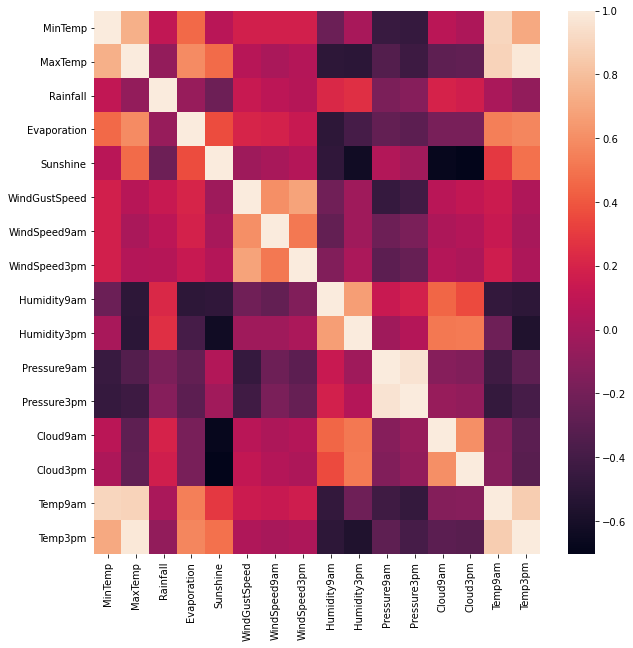

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())
plt.show()

Также откинем Temp3pm тк меджу ним и MaxTemp высокая корреляция.

In [9]:
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
continuous_columns = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
                      'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [10]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]

class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        m = X[self.key].mode(dropna=True)
        try:
            m = float(m)
        except:
            pass
        X[self.key] = X[self.key].fillna(m)
        return X

In [11]:
final_transformers = list()

for cat_col in categorical_columns:
    print()
    cat_transformer = Pipeline([
                ('imp', Imputer(cat_col)),
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    final_transformers.append((cat_col, cat_transformer))
    
for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('imp', Imputer(cont_col)),             
                ('selector', NumberSelector(key=cont_col)),
                ('standard', StandardScaler())
            ])
    final_transformers.append((cont_col, cont_transformer))

In [12]:
pipeline = make_pipeline(FeatureUnion(final_transformers), SMOTE(), GradientBoostingClassifier())

In [13]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('Location',
                                                 Pipeline(memory=None,
                                                          steps=[('imp',
                                                                  Imputer(key='Location')),
                                                                 ('selector',
                                                                  FeatureSelector(column='Location')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='Location'))],
                                                          verbose=False)),
                                                ('WindGustDir',
                                                 Pipeline(memory=None,
                                             

In [14]:
with open(path + "GB_pipeline.dill", "wb") as f:
    dill.dump(pipeline, f)

In [15]:
preds = pipeline.predict(X_test)

In [16]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 
    return f1, roc, rec, prc

In [17]:
score = evaluate_results(y_test, preds)

Classification results:
f1: 62.13%
roc: 76.71%
recall: 67.95%
precision: 57.23%
